In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data_path = 'news_dataset.csv'
news_data = pd.read_csv(data_path)

# Drop rows with missing text values
news_data.dropna(subset=['text'], inplace=True)

# Encode labels to numeric values (REAL=1, FAKE=0)
news_data['label'] = news_data['label'].map({'REAL': 1, 'FAKE': 0})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(news_data['text'], news_data['label'], test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


<ipython-input-2-6a0cfe9fed57>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=news_data, x='label', palette='viridis')


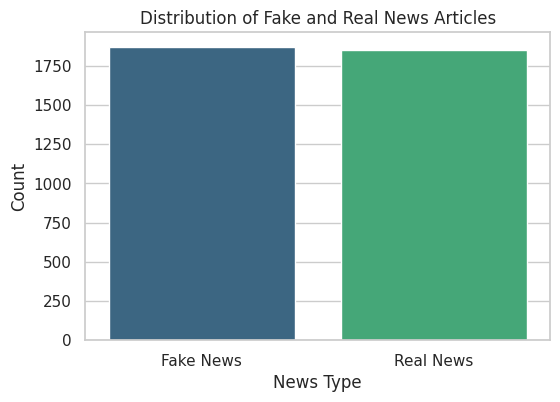

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=news_data, x='label', palette='viridis')
plt.xticks([0, 1], ['Fake News', 'Real News'])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.title("Distribution of Fake and Real News Articles")
plt.show()


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

best_model = None
best_accuracy = 0

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy:.2f}")

    # Select the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"Best Model: {best_model} with Accuracy: {best_accuracy}")


Logistic Regression Accuracy: 1.00
Naive Bayes Accuracy: 0.94
Support Vector Machine Accuracy: 1.00
Random Forest Accuracy: 1.00
Best Model: RandomForestClassifier() with Accuracy: 0.9973154362416108


In [4]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_fake_news_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [1]:
# Step 1: Install Flask and pyngrok
!pip install Flask pyngrok

# Step 2: Import necessary modules and authenticate ngrok
from pyngrok import ngrok

# Replace 'YOUR_AUTHTOKEN_HERE' with your actual ngrok auth token
ngrok.set_auth_token("cr_2oRQtnbV76VOaNif7ACuEoSAlID")

# Step 3: Rest of your Flask code as before
from flask import Flask, request, render_template_string
import joblib

# Load your model and vectorizer
model = joblib.load('best_fake_news_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# HTML template
html_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Fake News Detection</title>
    <style>
        body { font-family: Arial, sans-serif; display: flex; flex-direction: column; align-items: center; margin-top: 50px; }
        h2 { color: #4CAF50; }
        textarea { width: 400px; height: 150px; }
        input[type="submit"] { margin-top: 10px; background-color: #4CAF50; color: white; padding: 10px 15px; border: none; cursor: pointer; }
    </style>
</head>
<body>
    <h2>Fake News Detection</h2>
    <form action="/predict" method="post">
        <textarea name="news" placeholder="Enter news text here..."></textarea><br>
        <input type="submit" value="Check News">
    </form>
    {% if prediction_text %}
    <h3>{{ prediction_text }}</h3>
    {% endif %}
</body>
</html>
"""

# Initialize Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return render_template_string(html_template)

@app.route('/predict', methods=['POST'])
def predict():
    news_text = request.form['news']
    text_vector = tfidf_vectorizer.transform([news_text])
    prediction = model.predict(text_vector)
    result = 'Real News' if prediction[0] == 1 else 'Fake News'
    return render_template_string(html_template, prediction_text=f'The news is: {result}')

# Open a tunnel on port 5000
public_url = ngrok.connect(port='5000')
print(f"Public URL: {public_url}")

# Run Flask app
app.run(port=5000)


FileNotFoundError: [Errno 2] No such file or directory: 'best_fake_news_model.pkl'